# Define initial functions (just hit ctrl + shift to run this first cell)

In [430]:
import numpy as np
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LightSource
def kcalc(D,pc,pm,pw,g,m,n,Ly,Lx,Ny=0,Nx=0,Nxy=0):
    k = np.zeros([np.int32(m/2+1),np.int32(n/2+1)]);
    f = pc/(pm-pw) # inverse for ero
    k[0,0] = f;
    dGR = g*(pm-pw)
    for i in range(1, int(np.ceil((m-1)/2)+1)):
        ky = (i) / Ly
        k[i, 0] =  f * 1. / (1. + ( D / dGR * (2 * np.pi * ky) ** 4) + 4. / (pm * g) * np.pi ** 2. * Ny * ky ** 2);
    
    for j in range(1, int(np.ceil((n-1)/2) + 1)):
        kx = (j) / Lx
        k[0, j] = f * 1. / ( 1. +  ( D / dGR * (2 * np.pi * kx) ** 4) + 4. / (pm * g) * np.pi ** 2. * Nx * kx ** 2);
    
    for i in range(1,int(np.ceil((m-1)/2)+1)):
        for j in range(1,int(np.ceil((n-1)/2)+1)):
           
            ky = (i) / Ly
            kx = (j) / Lx
            k[i,j] = f * 1. / (1. +  D / dGR * ( 2. * np.pi * np.sqrt( ky ** 2 + kx ** 2. )) ** 4. + 4. * np.pi ** 2 / 
                    (pm*g) * ( Nx * kx ** 2 + Ny * ky ** 2 + Nxy * ky * kx ) );
    k = np.hstack([k, np.flip(k[:,1:-1],1)]);
    k = np.vstack([k, np.flip(k[1:-1,:],0)]);
    return k
def flexural(ero, Te=20e3, dy=1000,dx=1000, E = 100e9, g = 9.81, v = 0.25, pm = 3300, pc = 2750, Nx = 0, Ny = 0, Nxy = 0, buffer = 0, ncores = 1):
    
    pw = 0;# water density
    m,n = np.shape(ero);
    
    
    D = E*(Te)**3/(12*(1-v**2));
    
    Ly = m * dy - dy;
    Lx = n * dx - dx;
    
    bufferx = 0
    buffery = 0
    
    #imshow(ero)
    m,n = np.shape(ero);

        
    h = fft2(ero + 1e-6);
    k = kcalc(D,pc,pm,pw,g,m,n,Ly,Lx,Ny=Ny,Nx=Nx,Nxy=Nxy)
    
    w2 = k * h;
        
    w = np.real(ifft2(w2));
    return w

# Set up initial load
## Initially a block load

Text(0.5, 1.0, 'Elevation (m)')

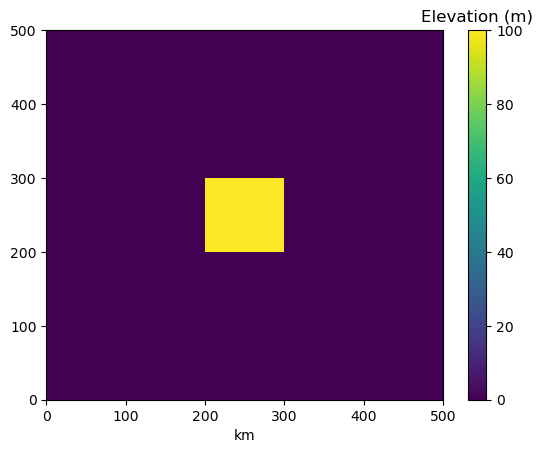

In [453]:
L = np.zeros([500,500])
L[201:300,201:300] = 100
plt.pcolor(L)
plt.xlabel('km')
c=plt.colorbar()
c.ax.set_title('Elevation (m)')

# We can run the model while modifying Te to seee the elastic response

Text(0, 0.5, 'Elevation (m)')

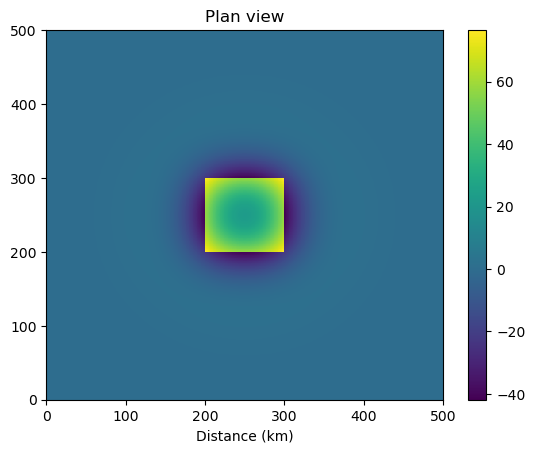

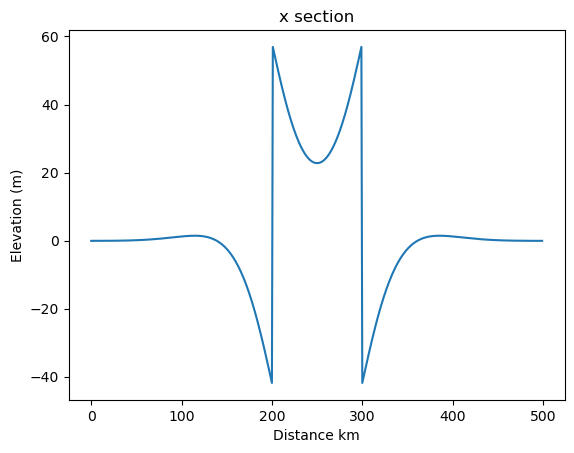

In [451]:
# Modify this elastic thickness (meters)
Te=10e3 #meters
#


w=flexural(L,Te=Te)
x = np.arange(500)
y = np.arange(500)
ls = LightSource(270, 45)
ls.shade(L-w, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
X,Y=np.meshgrid(x,y)
Tload=L-w
plt.pcolor(Tload)
plt.title('Plan view')
plt.xlabel('Distance (km)')
ax.view_init(elev=30.)
plt.colorbar()
plt.figure()
plt.title('x section')
plt.plot(Tload[250,:])
plt.xlabel('Distance km')
plt.ylabel('Elevation (m)')